In [ ]:
## Python basics for novice data scientists, supported by Wagatsuma Lab@Kyutech 
#
# The MIT License (MIT): Copyright (c) 2020 Hiroaki Wagatsuma and Wagatsuma Lab@Kyutech
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. */
#
# # @Time    : 2025-4-17 
# # @Author  : Hiroaki Wagatsuma
# # @Site    : https://github.com/hirowgit/2A_python_basic_course
# # @IDE     : Python 3.9.16 (main, Dec  7 2022, 10:15:43) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
# # @File    : lec5_step01.py 

In [27]:
# module test: if you have an error when you run this code, 
# you need to check the installation status of those modules

import math 
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.cm as cm
import matplotlib as mp
import tkinter as tk

from scipy import interpolate

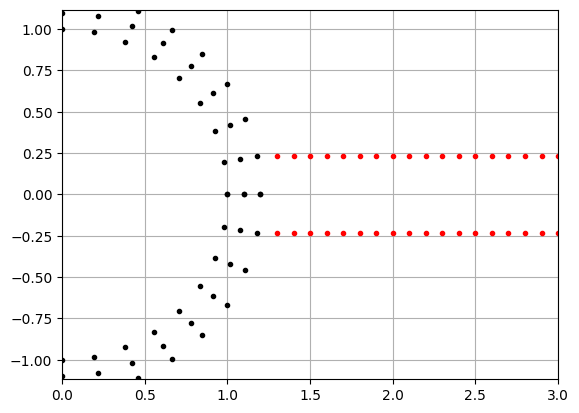

In [7]:
rotA=lambda th: np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])

# roadLen=10
roadLen=5
NofSeg=8
NoofConn=4

NofD=NofSeg*4+1
datD=np.linspace(0, 2*np.pi, num=NofD)

NofD=NofSeg*NoofConn+1

C0=np.arange(1,32,8)-1
Conn=np.flipud(np.vstack([C0+1,np.roll(C0+NofSeg-1,1)]))
connRoad=np.arange(max(radD),roadLen,radDw)+radDw

figNum=12
fig = plt.figure(figNum)
fig.clear()
plt.cla()
# maxR=[-100,100]
radDinit=1
radDw=0.1
radD=np.linspace(radDinit,radDinit+radDw*(3-1),3)

xD=np.tile(radD,[len(datD),1])*np.tile(np.cos(datD),[len(radD),1]).T
yD=np.tile(radD,[len(datD),1])*np.tile(np.sin(datD),[len(radD),1]).T
plt.plot(xD,yD,'k.',linewidth=2)

ConnFlat=np.reshape(Conn[:],[1,8])[0]
xD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.cos(datD[ConnFlat]),[len(radD),1]).T
yD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.sin(datD[ConnFlat]),[len(radD),1]).T

radD2=connRoad

key=np.where(np.diff(datD[Conn[:]],axis=0)<0)[1]
mAng=np.mean(datD[Conn[:]],axis=0)
mAng[key]=mAng[key] % np.pi
mAng2=np.tile(mAng,[1,2])

xD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.cos(mAng2),[len(radD2),1]).T
yD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.sin(mAng2),[len(radD2),1]).T

unitVec=np.array([np.cos(mAng),np.sin(mAng)])
# display(unitVec)

paramW=radD[-1]*np.sin(datD[1])

Lane1shift=np.dot(rotA(np.pi/2),paramW*unitVec)
Lane2shift=np.dot(rotA(-np.pi/2),paramW*unitVec)

xShift=np.hstack([Lane1shift[0],Lane2shift[0]])
yShift=np.hstack([Lane1shift[1],Lane2shift[1]])

xShiftFull=np.tile(xShift,[len(radD2),1])
yShiftFull=np.tile(yShift,[len(radD2),1])

xD2r2=xD2r+xShiftFull.T
yD2r2=yD2r+yShiftFull.T

plt.plot(xD2r2,yD2r2,'r.',linewidth=2)


plt.grid()
plt.axis('equal')
plt.xlim(0,3)
plt.ylim(-1,1)

plt.show()

In [23]:
xD2rS=[]
xD2r+xShiftFull.T

array([[ 1.69      ,  1.92      ,  2.15      ,  2.38      ,  2.61      ,
         2.84      ,  3.07      ,  3.3       ,  3.53      ,  3.76      ,
         3.99      ,  4.22      ,  4.45      ,  4.68      ,  4.91      ,
         5.14      ],
       [-0.28483187, -0.28483187, -0.28483187, -0.28483187, -0.28483187,
        -0.28483187, -0.28483187, -0.28483187, -0.28483187, -0.28483187,
        -0.28483187, -0.28483187, -0.28483187, -0.28483187, -0.28483187,
        -0.28483187],
       [-1.69      , -1.92      , -2.15      , -2.38      , -2.61      ,
        -2.84      , -3.07      , -3.3       , -3.53      , -3.76      ,
        -3.99      , -4.22      , -4.45      , -4.68      , -4.91      ,
        -5.14      ],
       [ 0.28483187,  0.28483187,  0.28483187,  0.28483187,  0.28483187,
         0.28483187,  0.28483187,  0.28483187,  0.28483187,  0.28483187,
         0.28483187,  0.28483187,  0.28483187,  0.28483187,  0.28483187,
         0.28483187],
       [ 1.69      ,  1.92      ,  2

In [24]:
xD2rS=xD2rS+[xD2r+xShiftFull.T]
xD2rS

[array([[ 1.69      ,  1.92      ,  2.15      ,  2.38      ,  2.61      ,
          2.84      ,  3.07      ,  3.3       ,  3.53      ,  3.76      ,
          3.99      ,  4.22      ,  4.45      ,  4.68      ,  4.91      ,
          5.14      ],
        [-0.28483187, -0.28483187, -0.28483187, -0.28483187, -0.28483187,
         -0.28483187, -0.28483187, -0.28483187, -0.28483187, -0.28483187,
         -0.28483187, -0.28483187, -0.28483187, -0.28483187, -0.28483187,
         -0.28483187],
        [-1.69      , -1.92      , -2.15      , -2.38      , -2.61      ,
         -2.84      , -3.07      , -3.3       , -3.53      , -3.76      ,
         -3.99      , -4.22      , -4.45      , -4.68      , -4.91      ,
         -5.14      ],
        [ 0.28483187,  0.28483187,  0.28483187,  0.28483187,  0.28483187,
          0.28483187,  0.28483187,  0.28483187,  0.28483187,  0.28483187,
          0.28483187,  0.28483187,  0.28483187,  0.28483187,  0.28483187,
          0.28483187],
        [ 1.69      

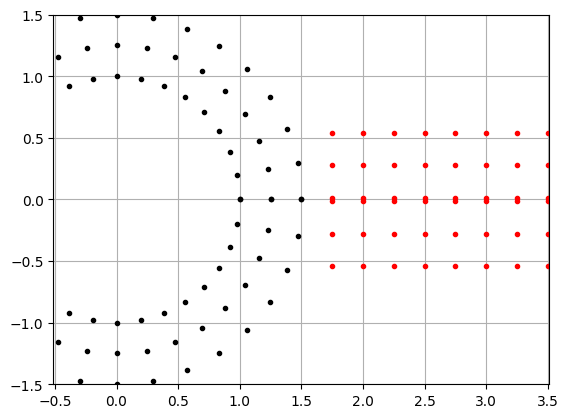

In [76]:
rotA=lambda th: np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])

# roadLen=10
roadLen=5
NofSeg=8
NoofConn=4

NofD=NofSeg*4+1
datD=np.linspace(0, 2*np.pi, num=NofD)

NofD=NofSeg*NoofConn+1

figNum=13
fig = plt.figure(figNum)
fig.clear()
plt.cla()
# maxR=[-100,100]
radDinit=1
radDw=0.25
radD=np.linspace(radDinit,radDinit+radDw*(3-1),3)

C0=np.arange(1,32,8)-1
Conn=np.flipud(np.vstack([C0+1,np.roll(C0+NofSeg-1,1)]))
connRoad=np.arange(max(radD),roadLen,radDw)+radDw

paramW=radD[-1]*np.sin(datD[1])

xD=np.tile(radD,[len(datD),1])*np.tile(np.cos(datD),[len(radD),1]).T
yD=np.tile(radD,[len(datD),1])*np.tile(np.sin(datD),[len(radD),1]).T
plt.plot(xD,yD,'k.',linewidth=2)

ConnFlat=np.reshape(Conn[:],[1,8])[0]
xD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.cos(datD[ConnFlat]),[len(radD),1]).T
yD2=np.tile(radD,[len(datD[ConnFlat]),1])*np.tile(np.sin(datD[ConnFlat]),[len(radD),1]).T

radD2=connRoad

key=np.where(np.diff(datD[Conn[:]],axis=0)<0)[1]
mAng=np.mean(datD[Conn[:]],axis=0)
mAng[key]=mAng[key] % np.pi
mAng2=np.tile(mAng,[1,2])

xD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.cos(mAng2),[len(radD2),1]).T
yD2r=np.tile(radD2,[len(datD[ConnFlat]),1])*np.tile(np.sin(mAng2),[len(radD2),1]).T

unitVec=np.array([np.cos(mAng),np.sin(mAng)])

# plt.plot(xD2r,yD2r,'r.',linewidth=2)
xD2rS=[]
yD2rS=[]
for kk in range(3):
    Lane1shift=np.dot(rotA(np.pi/2),(kk*0.9+0.05)*paramW*unitVec)
    Lane2shift=np.dot(rotA(-np.pi/2),(kk*0.9+0.05)*paramW*unitVec)
    
    xShift=np.hstack([Lane1shift[0],Lane2shift[0]])
    yShift=np.hstack([Lane1shift[1],Lane2shift[1]])
    
    xShiftFull=np.tile(xShift,[len(radD2),1])
    yShiftFull=np.tile(yShift,[len(radD2),1])
    
    xD2rS=xD2rS+[xD2r+xShiftFull.T]
    yD2rS=yD2rS+[yD2r+yShiftFull.T]

    plt.plot(xD2rS[kk],yD2rS[kk],'r.',linewidth=2)

plt.grid()
plt.axis('equal')
plt.xlim(0,3)
plt.ylim(-1.5,1.5)

plt.show()

In [65]:
pBase=3
arcKey=np.tile(C0+2,[pBase,1]).T+np.tile(range(pBase),[len(C0),1])
arcKey2=np.fliplr(arcKey)
arcKey2

array([[ 4,  3,  2],
       [12, 11, 10],
       [20, 19, 18],
       [28, 27, 26]])

array([[ 4,  3,  2],
       [12, 11, 10],
       [20, 19, 18],
       [28, 27, 26]])

In [51]:
yD2rS[0][0]

array([0.01463177, 0.01463177, 0.01463177, 0.01463177, 0.01463177,
       0.01463177, 0.01463177, 0.01463177, 0.01463177, 0.01463177,
       0.01463177, 0.01463177, 0.01463177, 0.01463177])

In [123]:
np.shape(xD2rS)

(3, 8, 14)

In [77]:
np.shape(xD2)

(8, 3)

In [90]:
xD.T

array([[ 1.00000000e+00,  9.80785280e-01,  9.23879533e-01,
         8.31469612e-01,  7.07106781e-01,  5.55570233e-01,
         3.82683432e-01,  1.95090322e-01,  6.12323400e-17,
        -1.95090322e-01, -3.82683432e-01, -5.55570233e-01,
        -7.07106781e-01, -8.31469612e-01, -9.23879533e-01,
        -9.80785280e-01, -1.00000000e+00, -9.80785280e-01,
        -9.23879533e-01, -8.31469612e-01, -7.07106781e-01,
        -5.55570233e-01, -3.82683432e-01, -1.95090322e-01,
        -1.83697020e-16,  1.95090322e-01,  3.82683432e-01,
         5.55570233e-01,  7.07106781e-01,  8.31469612e-01,
         9.23879533e-01,  9.80785280e-01,  1.00000000e+00],
       [ 1.25000000e+00,  1.22598160e+00,  1.15484942e+00,
         1.03933702e+00,  8.83883476e-01,  6.94462791e-01,
         4.78354290e-01,  2.43862903e-01,  7.65404249e-17,
        -2.43862903e-01, -4.78354290e-01, -6.94462791e-01,
        -8.83883476e-01, -1.03933702e+00, -1.15484942e+00,
        -1.22598160e+00, -1.25000000e+00, -1.22598160e+

In [176]:
i=0 # 
j=0 #
x=xD2r[j][arcKey2[i]]+xD2rS[0][j][:pBase]
y=yD2r[j][arcKey2[i]]+yD2rS[0][j][:pBase]

x=np.hstack([xD.T[j][arcKey2[i]],xD2rS[i][j][:pBase]])
y=np.hstack([yD.T[j][arcKey2[i]],yD2rS[i][j][:pBase]])
x,y

(array([0.70710678, 0.83146961, 0.92387953, 1.75      , 2.        ,
        2.25      ]),
 array([0.70710678, 0.55557023, 0.38268343, 0.01463177, 0.01463177,
        0.01463177]))

In [177]:
xSet,ySet=[],[]

x=np.hstack([xD.T[j][arcKey2[i]],xD2rS[i][j][:pBase]])
y=np.hstack([yD.T[j][arcKey2[i]],yD2rS[i][j][:pBase]])
x,y

x=xD.T[i,arcKey2]
y=yD.T[i,arcKey2]

x2=xD2rS[i][:4,:pBase]

In [143]:
np.shape(xD.T)

(3, 33)

In [149]:
arcKey2

array([[ 4,  3,  2],
       [12, 11, 10],
       [20, 19, 18],
       [28, 27, 26]])

In [150]:
np.shape(xD.T)

(3, 33)

In [180]:
x1=xD.T[i,arcKey2]
x2=xD2rS[i][:4,:pBase]
x1,x2
np.shape(x1),np.shape(x2)
# y=np.hstack([yD.T[j][arcKey2[i]],yD2rS[i][j][:pBase]])

i=0
x=np.hstack([xD.T[i,arcKey2],xD2rS[i][:4,:pBase]])
y=np.hstack([yD.T[i,arcKey2],yD2rS[i][:4,:pBase]])


In [118]:
np.shape(xD2rS)

(3, 8, 14)

In [140]:
i=1 # 
j=2 #

x=xD2rS[i][:4,:pBase]
y=yD2rS[i][:4,:pBase]
x,y

x2=xD2rS[i][4:,:pBase]
y2=yD2rS[i][4:,:pBase]
x2,y2

(array([[ 1.75      ,  2.        ,  2.25      ],
        [ 0.27800371,  0.27800371,  0.27800371],
        [-1.75      , -2.        , -2.25      ],
        [-0.27800371, -0.27800371, -0.27800371]]),
 array([[-0.27800371, -0.27800371, -0.27800371],
        [ 1.75      ,  2.        ,  2.25      ],
        [ 0.27800371,  0.27800371,  0.27800371],
        [-1.75      , -2.        , -2.25      ]]))

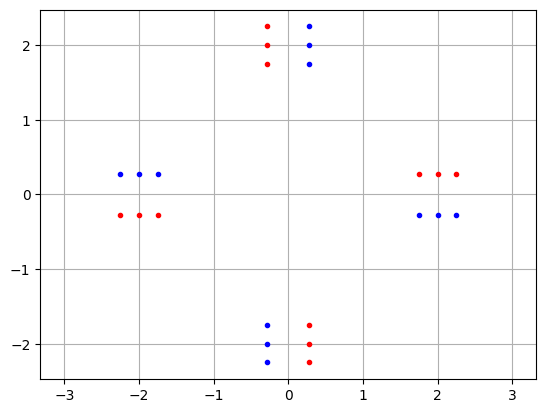

In [141]:
figNum=14
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(x,y,'r.',linewidth=2)
plt.plot(x2,y2,'b.',linewidth=2)

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [172]:
i=1 # 
j=3 #

x=xD.T[i,arcKey2]
y=yD.T[i,arcKey2]
x,y

# x2=xD2rS[i][4:,:pBase]
# y2=yD2rS[i][4:,:pBase]
x2,y2

(array([[ 1.75      ,  2.        ,  2.25      ],
        [-0.27800371, -0.27800371, -0.27800371],
        [-1.75      , -2.        , -2.25      ],
        [ 0.27800371,  0.27800371,  0.27800371]]),
 array([[-0.27800371, -0.27800371, -0.27800371],
        [ 1.75      ,  2.        ,  2.25      ],
        [ 0.27800371,  0.27800371,  0.27800371],
        [-1.75      , -2.        , -2.25      ]]))

In [168]:
arcKey2[i]

array([12, 11, 10])

In [165]:
xD.T

array([[ 1.00000000e+00,  9.80785280e-01,  9.23879533e-01,
         8.31469612e-01,  7.07106781e-01,  5.55570233e-01,
         3.82683432e-01,  1.95090322e-01,  6.12323400e-17,
        -1.95090322e-01, -3.82683432e-01, -5.55570233e-01,
        -7.07106781e-01, -8.31469612e-01, -9.23879533e-01,
        -9.80785280e-01, -1.00000000e+00, -9.80785280e-01,
        -9.23879533e-01, -8.31469612e-01, -7.07106781e-01,
        -5.55570233e-01, -3.82683432e-01, -1.95090322e-01,
        -1.83697020e-16,  1.95090322e-01,  3.82683432e-01,
         5.55570233e-01,  7.07106781e-01,  8.31469612e-01,
         9.23879533e-01,  9.80785280e-01,  1.00000000e+00],
       [ 1.25000000e+00,  1.22598160e+00,  1.15484942e+00,
         1.03933702e+00,  8.83883476e-01,  6.94462791e-01,
         4.78354290e-01,  2.43862903e-01,  7.65404249e-17,
        -2.43862903e-01, -4.78354290e-01, -6.94462791e-01,
        -8.83883476e-01, -1.03933702e+00, -1.15484942e+00,
        -1.22598160e+00, -1.25000000e+00, -1.22598160e+

In [162]:
arcKey2

array([[ 4,  3,  2],
       [12, 11, 10],
       [20, 19, 18],
       [28, 27, 26]])

In [166]:
np.shape(xD.T)

(3, 33)

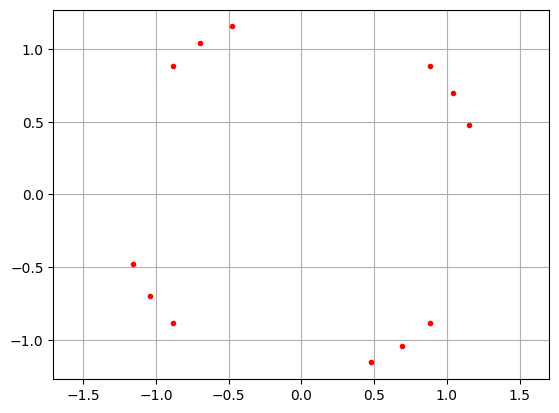

In [173]:
figNum=15
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(x,y,'r.',linewidth=2)
# plt.plot(x2,y2,'b.',linewidth=2)

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

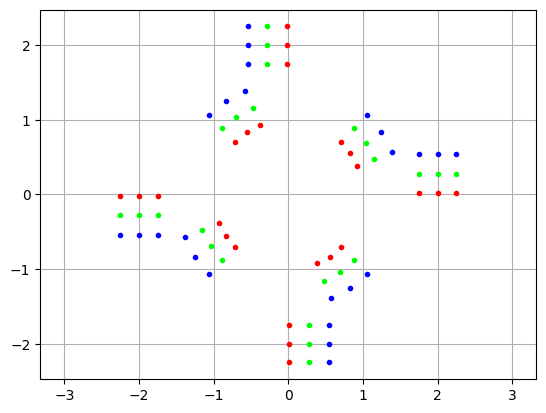

In [186]:
xFull=[np.hstack([xD.T[i,arcKey2],xD2rS[i][:4,:pBase]]) for i in range(3)]
yFull=[np.hstack([yD.T[i,arcKey2],yD2rS[i][:4,:pBase]]) for i in range(3)]

figNum=16
fig = plt.figure(figNum)
fig.clear()
plt.cla()

myCol=[[1,0,0],[0,1,0],[0,0,1]]

for i in range(3):
    plt.plot(xFull[i],yFull[i],'.',linewidth=2, color =myCol[i])

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [189]:
xd=np.linspace(np.min(x),np.max(x),10)
xd

array([-2.25, -1.75, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,
        2.25])

In [192]:
x[0]

array([0.70710678, 0.83146961, 0.92387953, 1.75      , 2.        ,
       2.25      ])

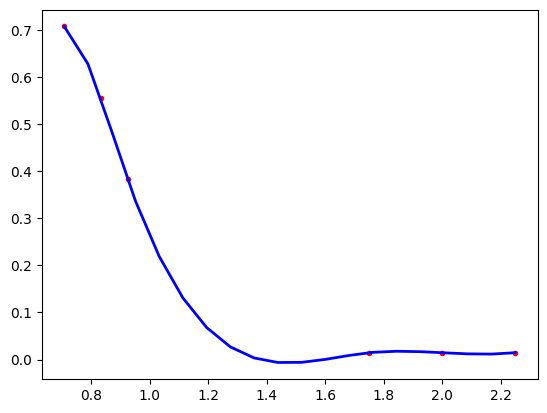

In [195]:
i=0
j=0
x=xFull[i][j]
y=yFull[i][j]

fc = interpolate.interp1d(x, y,kind='cubic')
xd=np.linspace(np.min(x),np.max(x),20)

figNum=17
fig = plt.figure(figNum)
fig.clear()
plt.cla()

plt.plot(x,y,'r.',linewidth=2)
plt.plot(xd,fc(xd),'b-',linewidth=2)

In [197]:
fc

In [204]:
fcF(x,y)(x)

array([0.70710678, 0.55557023, 0.38268343, 0.01463177, 0.01463177,
       0.01463177])

In [208]:
xd

[array([0.70710678, 0.78831169, 0.86951659, 0.9507215 , 1.03192641,
        1.11313131, 1.19433622, 1.27554112, 1.35674603, 1.43795094,
        1.51915584, 1.60036075, 1.68156566, 1.76277056, 1.84397547,
        1.92518037, 2.00638528, 2.08759019, 2.16879509, 2.25      ]),
 array([-0.70710678, -0.67066073, -0.63421468, -0.59776862, -0.56132257,
        -0.52487652, -0.48843046, -0.45198441, -0.41553836, -0.3790923 ,
        -0.34264625, -0.3062002 , -0.26975415, -0.23330809, -0.19686204,
        -0.16041599, -0.12396993, -0.08752388, -0.05107783, -0.01463177]),
 array([-2.25      , -2.16879509, -2.08759019, -2.00638528, -1.92518037,
        -1.84397547, -1.76277056, -1.68156566, -1.60036075, -1.51915584,
        -1.43795094, -1.35674603, -1.27554112, -1.19433622, -1.11313131,
        -1.03192641, -0.9507215 , -0.86951659, -0.78831169, -0.70710678]),
 array([0.01463177, 0.05107783, 0.08752388, 0.12396993, 0.16041599,
        0.19686204, 0.23330809, 0.26975415, 0.3062002 , 0.34264625,
  

In [210]:
fcF(xS[i],yS[i])(xd[i])

array([-1.46317742e-02, -1.16778943e-02, -1.21605810e-02, -1.44265513e-02,
       -1.68225220e-02, -1.76952102e-02, -1.53913327e-02, -8.81167428e-03,
       -4.33395181e-04,  5.84597094e-03,  6.12528992e-03, -3.49657242e-03,
       -2.69207503e-02, -6.80483778e-02, -1.30780589e-01, -2.19018518e-01,
       -3.36663300e-01, -4.84494049e-01, -6.27361070e-01, -7.07106781e-01])

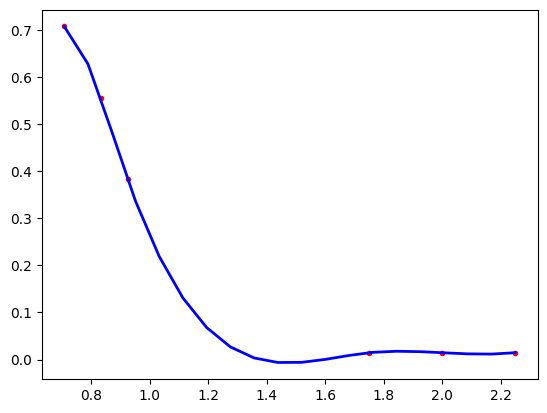

In [223]:
i=0
j=0
xS=xFull[i]
yS=yFull[i]

fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
xd= [np.linspace(np.min(x),np.max(x),20) for x,y in zip(xS,yS)]

figNum=18
fig = plt.figure(figNum)
fig.clear()
plt.cla()

for i in range(1):
    plt.plot(xS[i],yS[i],'r.',linewidth=2)
    # fc=fcF(xS[i],yS[i])
    plt.plot(xd[i],fcF(xS[i],yS[i])(xd[i]),'b-',linewidth=2)

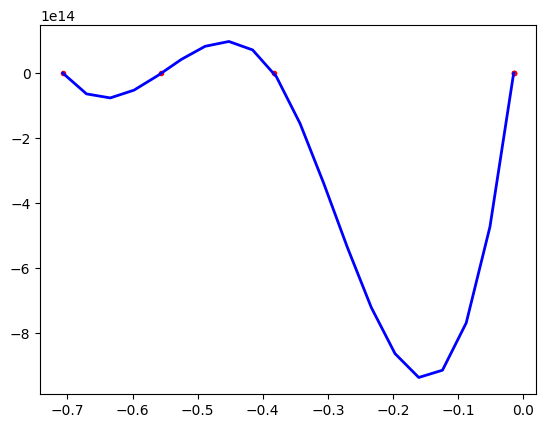

In [224]:
i=0
j=0
xS=xFull[j]
yS=yFull[j]

fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
xd= [np.linspace(np.min(x),np.max(x),20) for x,y in zip(xS,yS)]

figNum=19
fig = plt.figure(figNum)
fig.clear()
plt.cla()

for i in range(1,2):
    plt.plot(xS[i],yS[i],'r.',linewidth=2)
    # fc=fcF(xS[i],yS[i])
    plt.plot(xd[i],fcF(xS[i],yS[i])(xd[i]),'b-',linewidth=2)

In [217]:
xd

[array([0.70710678, 0.78831169, 0.86951659, 0.9507215 , 1.03192641,
        1.11313131, 1.19433622, 1.27554112, 1.35674603, 1.43795094,
        1.51915584, 1.60036075, 1.68156566, 1.76277056, 1.84397547,
        1.92518037, 2.00638528, 2.08759019, 2.16879509, 2.25      ]),
 array([-0.70710678, -0.67066073, -0.63421468, -0.59776862, -0.56132257,
        -0.52487652, -0.48843046, -0.45198441, -0.41553836, -0.3790923 ,
        -0.34264625, -0.3062002 , -0.26975415, -0.23330809, -0.19686204,
        -0.16041599, -0.12396993, -0.08752388, -0.05107783, -0.01463177]),
 array([-2.25      , -2.16879509, -2.08759019, -2.00638528, -1.92518037,
        -1.84397547, -1.76277056, -1.68156566, -1.60036075, -1.51915584,
        -1.43795094, -1.35674603, -1.27554112, -1.19433622, -1.11313131,
        -1.03192641, -0.9507215 , -0.86951659, -0.78831169, -0.70710678]),
 array([0.01463177, 0.05107783, 0.08752388, 0.12396993, 0.16041599,
        0.19686204, 0.23330809, 0.26975415, 0.3062002 , 0.34264625,
  

In [221]:
xS[1]

array([-0.70710678, -0.55557023, -0.38268343, -0.01463177, -0.01463177,
       -0.01463177])

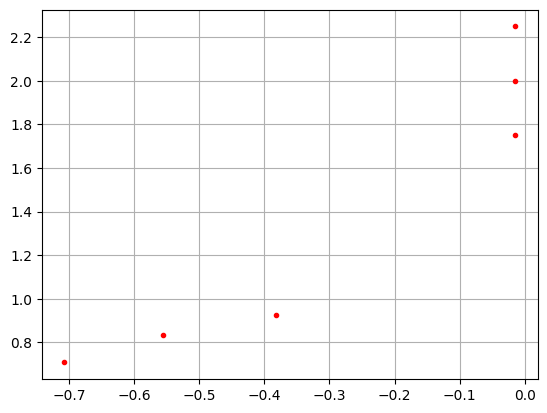

In [226]:
i=0
j=0
xS=xFull[j]
yS=yFull[j]

fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
xd = [np.linspace(np.min(x),np.max(x),20) for x,y in zip(xS,yS)]

figNum=20
fig = plt.figure(figNum)
fig.clear()
plt.cla()

# for i in range(1,2):
i=1
plt.plot(xS[i],yS[i],'r.',linewidth=2)
# fc=fcF(xS[i],yS[i])
# plt.plot(xd[i],fcF(xS[i],yS[i])(xd[i]),'b-',linewidth=2)
plt.grid()

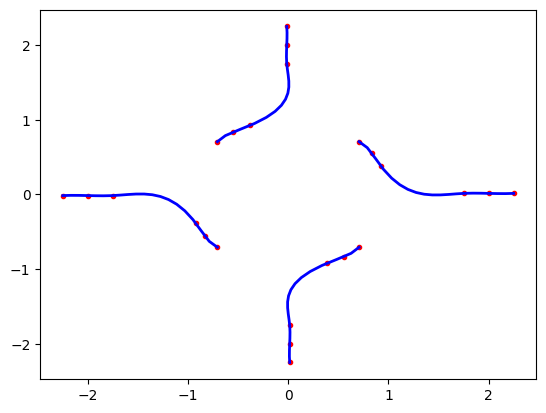

In [231]:
i=0
j=0
xS=xFull[j]
yS=yFull[j]

fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
xd= [np.linspace(np.min(x),np.max(x),20) for x,y in zip(xS,yS)]
yd= [np.linspace(np.min(y),np.max(y),20) for x,y in zip(xS,yS)]

figNum=21
fig = plt.figure(figNum)
fig.clear()
plt.cla()

for i in range(4):
    plt.plot(xS[i],yS[i],'r.',linewidth=2)
    if i % 2 ==0:
        plt.plot(xd[i],fcF(xS[i],yS[i])(xd[i]),'b-',linewidth=2)
    else:
        plt.plot(fcF(yS[i],xS[i])(yd[i]),yd[i],'b-',linewidth=2)

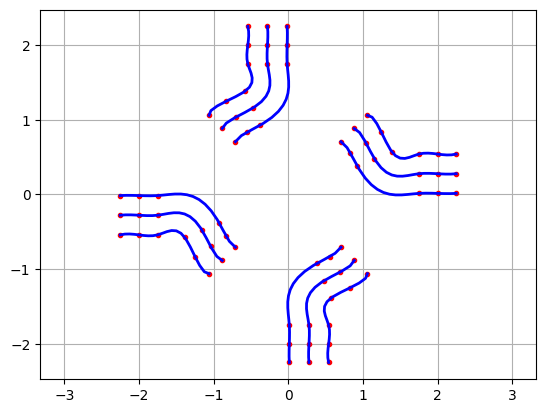

In [235]:
figNum=22
fig = plt.figure(figNum)
fig.clear()
plt.cla()

for j in range(3):
    xS=xFull[j]
    yS=yFull[j]
    
    fcF = lambda x,y: interpolate.interp1d(x, y,kind='cubic') 
    xd= [np.linspace(np.min(x),np.max(x),20) for x,y in zip(xS,yS)]
    yd= [np.linspace(np.min(y),np.max(y),20) for x,y in zip(xS,yS)]
    

    
    for i in range(4):
        plt.plot(xS[i],yS[i],'r.',linewidth=2)
        if i % 2 ==0:
            plt.plot(xd[i],fcF(xS[i],yS[i])(xd[i]),'b-',linewidth=2)
        else:
            plt.plot(fcF(yS[i],xS[i])(yd[i]),yd[i],'b-',linewidth=2)

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()

In [238]:
C0

array([ 0,  8, 16, 24])

In [ ]:
pBase=3
arcKey=np.tile(C0+2,[pBase,1]).T+np.tile(range(pBase),[len(C0),1])
arcKey2=np.fliplr(arcKey)

arcKey=np.tile(C0+2,[pBase,1]).T+np.tile(range(pBase),[len(C0),1])
arcKey2=np.fliplr(arcKey)

xFull=[np.hstack([xD.T[i,arcKey2],xD2rS[i][:4,:pBase]]) for i in range(3)]
yFull=[np.hstack([yD.T[i,arcKey2],yD2rS[i][:4,:pBase]]) for i in range(3)]



figNum=16
fig = plt.figure(figNum)
fig.clear()
plt.cla()

myCol=[[1,0,0],[0,1,0],[0,0,1]]

for i in range(3):
    plt.plot(xFull[i],yFull[i],'.',linewidth=2, color =myCol[i])

plt.grid()
plt.axis('equal')
# plt.xlim(0,3)
# plt.ylim(-1.5,1.5)

plt.show()